<a href="https://colab.research.google.com/github/Alfa4026/StatMul_2025/blob/main/Tugas/Latihan_statmul_dasar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktek
1. Hapus data outlier di data_1, lalu lakukan uji normalitas multivariat kembali
2. Untuk data_2, kategorikan usia menjadi : 16-20, 21-25, 26-30, 31-35. Lakukan analisis TURF, berapa lokasi iklan dan di lokasi mana saja agar minimal 80% customer di usia tersebut mengetahui produk baru perusahaan A


Kerjakan dan upload file .ipynb di LMS, batas waktu pengerjaan 1 minggu

---

Nama : Alif Alamsyah

NIM: 11220940000028
   
Kelas : A    

Notebook ini mencakup:
1. Analisis Deskriptif Data Multivariat
2. Uji Normalitas Multivariat
3. Visualisasi Data Multivariat
4. Deteksi Outlier

In [50]:
#Install Library
!pip install pingouin

In [51]:
#Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pingouin as pg
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

In [52]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/Alfa4026/StatMul_2025/main/Tugas/Datasets/data_1.xlsx
!wget -P data/ https://raw.githubusercontent.com/Alfa4026/StatMul_2025/main/Tugas/Datasets/data_2.xlsx

mkdir: cannot create directory ‘data’: File exists
--2025-04-21 02:50:25--  https://raw.githubusercontent.com/Alfa4026/StatMul_2025/main/Tugas/Datasets/data_1.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39028 (38K) [application/octet-stream]
Saving to: ‘data/data_1.xlsx.1’

data_1.xlsx.1       100%[===================>]  38.11K  --.-KB/s    in 0.006s  

2025-04-21 02:50:25 (6.67 MB/s) - ‘data/data_1.xlsx.1’ saved [39028/39028]

--2025-04-21 02:50:25--  https://raw.githubusercontent.com/Alfa4026/StatMul_2025/main/Tugas/Datasets/data_2.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... 

In [53]:
#Data
data_1 = pd.read_excel('data/data_1.xlsx')
data_2 = pd.read_excel('data/data_2.xlsx') # Changed to include 'MyFolder' in the path, if necessary

In [54]:
data_1

,X1,X2,X3,X4,X5
0,-0.675178,-0.721738,0.183835,0.185176,0.295972
1,-0.144519,0.176821,2.693034,0.425445,0.249296
2,-0.792420,-0.546680,0.349800,0.222290,0.148645
3,-0.307962,-0.271655,-1.004055,1.278866,1.959788
4,-1.893615,1.673452,-0.095464,-0.952316,0.693264
...,...,...,...,...,...
395,-1.449645,-0.848429,-1.880010,1.146441,0.228237
396,-0.921860,0.573128,0.712712,-0.973379,0.345186
397,-1.003957,-1.785866,-1.883150,1.007133,1.380745
398,0.207267,-0.359630,-0.372319,0.336145,0.658941


In [55]:
data_2

,Id,Usia,Kendaraan,Lokasi 1,Lokasi 2,Lokasi 3,Lokasi 4,Lokasi 5,Lokasi 6,Lokasi 7,...,Lokasi 91,Lokasi 92,Lokasi 93,Lokasi 94,Lokasi 95,Lokasi 96,Lokasi 97,Lokasi 98,Lokasi 99,Lokasi 100
0,1,22,Motor,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,25,Mobil,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,3,18,KRL,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4,30,TJ,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
4,5,35,KRL,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,34,KRL,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
396,397,32,Motor,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
397,398,31,Mobil,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
398,399,34,KRL,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,1,0,0


## 1. Analisis Deskriptif Data Multivariat

### Vektor Rata-rata

In [56]:
# 1. Vektor rata-rata
print('Vektor Rata-rata:')
mean_vector = data_1.mean()
mean_vector

Vektor Rata-rata:


,0
X1,-0.036319
X2,0.051908
X3,-0.070693
X4,0.069078
X5,0.993921


### Matriks Kovarian

In [57]:
# 2. Matriks Kovarian
print('matriks kovarian:')
cov_matrix = data_1.cov()
cov_matrix

matriks kovarian:


,X1,X2,X3,X4,X5
X1,0.943428,0.035188,-0.024397,-0.008838,-0.029389
X2,0.035188,0.917955,0.031877,0.019079,-0.152822
X3,-0.024397,0.031877,1.066227,-0.038343,0.049619
X4,-0.008838,0.019079,-0.038343,1.149317,-0.064539
X5,-0.029389,-0.152822,0.049619,-0.064539,0.924532


### Matriks Korelasi

In [58]:
# 3. Matriks Korelasi
print('matriks korelasi:')
corr_matrix = data_1.corr()
corr_matrix

matriks korelasi:


,X1,X2,X3,X4,X5
X1,1.000000,0.037812,-0.024326,-0.008487,-0.031468
X2,0.037812,1.000000,0.032221,0.018575,-0.165888
X3,-0.024326,0.032221,1.000000,-0.034637,0.049976
X4,-0.008487,0.018575,-0.034637,1.000000,-0.062610
X5,-0.031468,-0.165888,0.049976,-0.062610,1.000000


### Korelasi Parsial
Korelasi Parsial adalah korelasi antar 2 variabel dengan mengabaikan variabel lainnya.  Misalnya korelasi parsial antara variabel X dan Y, dengan mengontrol variabel Z, maka:

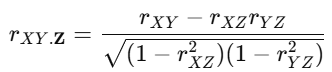

Jika ada lebih dari 3 variabel, maka matriks korelasi parsialnya dapat dibentuk dari rumus invers sebagai berikut :

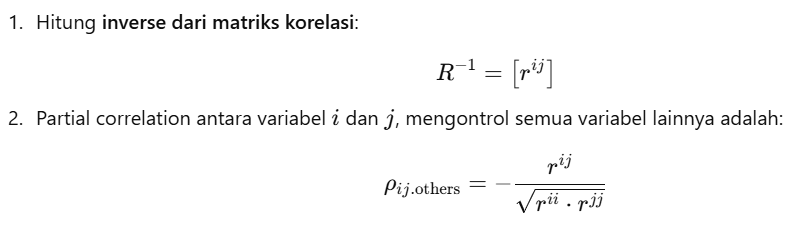

In [59]:
# 4. Matriks Korelasi Parsial
def partial_corr_matrix(df):
    corr_matrix = df.corr()                      #matriks korelasi
    inv_corr = np.linalg.inv(corr_matrix)        #inversnya
    p = inv_corr.shape[0]                        #jumlah variabel

    partial_corr = np.zeros((p, p))             #matriks 0 ukuran jumlah variabel
    for i in range(p):
        for j in range(p):
            if i == j:
                partial_corr[i, j] = 1         #1 untuk diagonalnya
            else:
                partial_corr[i, j] = -inv_corr[i, j] / np.sqrt(inv_corr[i, i] * inv_corr[j, j])    #hitungan partial correlationnya

    return pd.DataFrame(partial_corr, index=df.columns, columns=df.columns)

print("Matriks Korelasi Parsial:")
partial_corr_matrix(data_1)


Matriks Korelasi Parsial:


,X1,X2,X3,X4,X5
X1,1.000000,0.034153,-0.024545,-0.011547,-0.024814
X2,0.034153,1.000000,0.042218,0.010021,-0.165939
X3,-0.024545,0.042218,1.000000,-0.032251,0.053489
X4,-0.011547,0.010021,-0.032251,1.000000,-0.058789
X5,-0.024814,-0.165939,0.053489,-0.058789,1.000000


## 2. Uji Normalitas Multivariat

Secara umum ada 2 cara uji normalitas multivariat:

1. Uji Henze-Zirkler
2. Uji Histogram & Mardia (seperti uji skewness & kurtosis)

$H_0$ : Data berdistribusi normal multivariat

$H_1$ : Data tidak berdistribusi normal multivariat

### a. Uji Henze-Zirkler

In [60]:
#Uji Henze-Zirkler semua data
pg.multivariate_normality(data_1, alpha=0.05)

HZResults(hz=np.float64(1.4549714286591), pval=np.float64(1.8858606254687576e-13), normal=False)

**KESIMPULAN:**

Jika seluruh variabel dalam data disertakan, diperoleh nilai pvalue $< 0.05,$ maka $H_0$ ditolak, sehingga data tidak berdistribusi normal.

In [61]:
#Uji Henze-Zirkler khusus data X1 - X4 aja
pg.multivariate_normality(data_1[['X1', 'X2', 'X3', 'X4']], alpha=0.05)

HZResults(hz=np.float64(0.838366261639617), pval=np.float64(0.6891999011457024), normal=True)

**KESIMPULAN:**

Jika seluruh variabel dalam data disertakan tanpa variabel X5, diperoleh nilai pvalue $\geq 0.05,$ maka $H_0$ diterima, sehingga data berdistribusi normal multivariat.

### b. Uji Histogram & Mardia

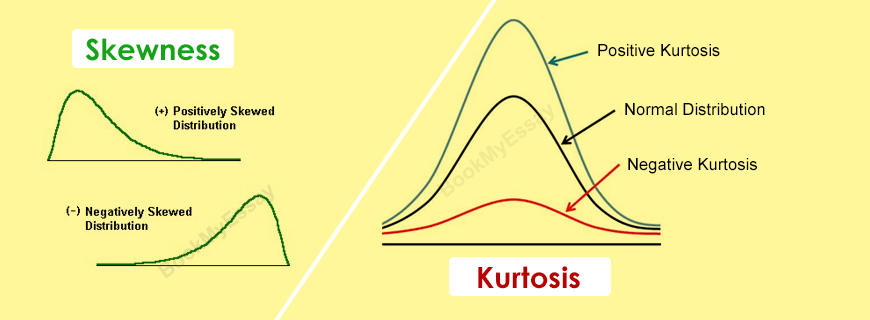

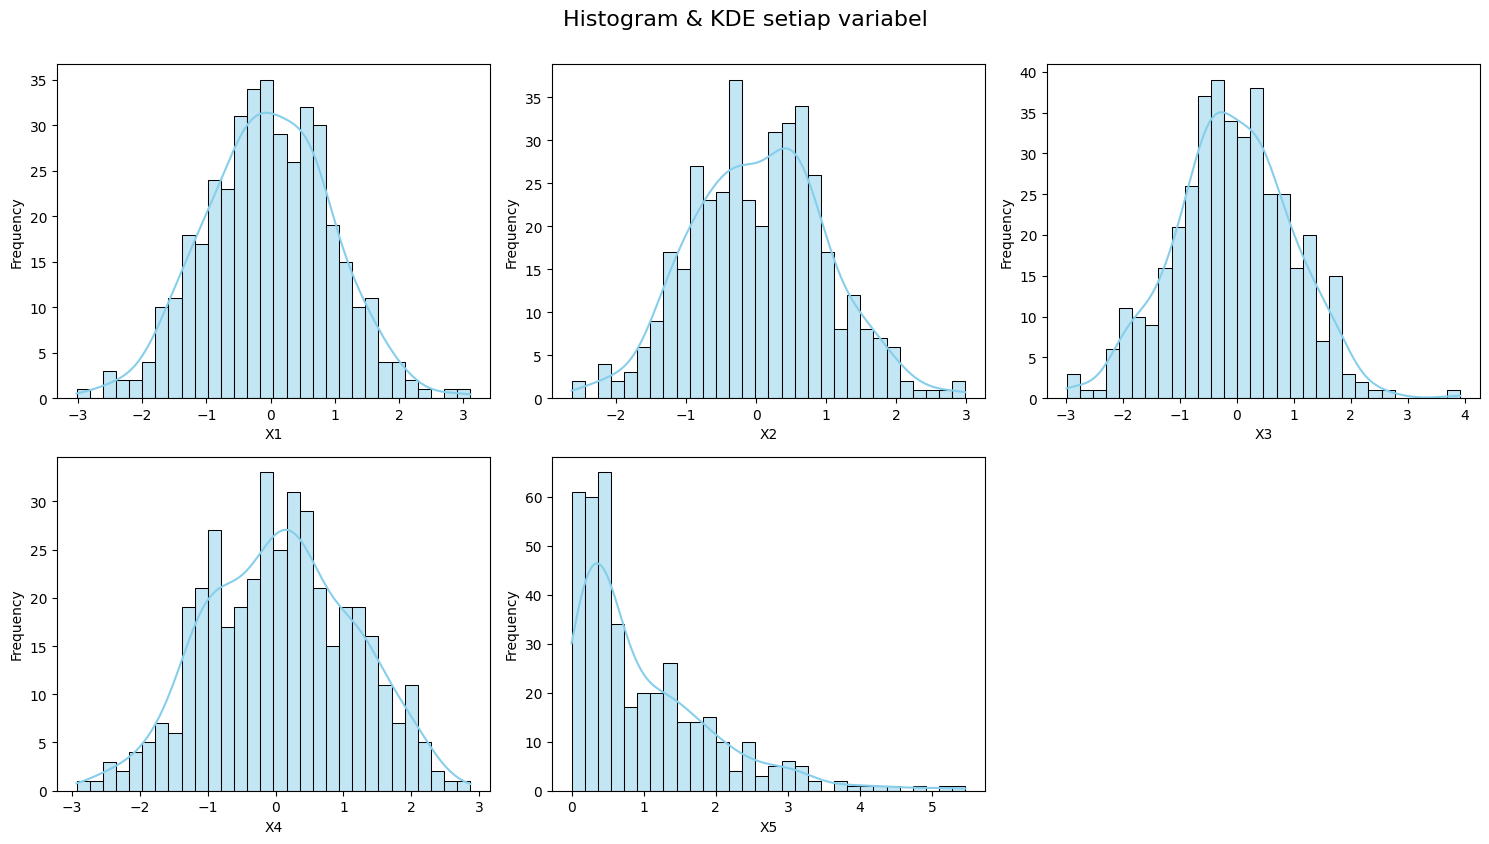

In [62]:
# Membuat Histogram 1 per 1
plt.figure(figsize=(15,8))
for i, col in enumerate(['X1', 'X2', 'X3', 'X4', 'X5']):
    plt.subplot(2, 3, i+1)
    sns.histplot(data_1[col], kde=True, bins=30, color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Histogram & KDE setiap variabel', fontsize=16, y=1.05)
plt.show()


**KESIMPULAN:**

Data tidak berdistribusi normal multivariat karena ada data X5 tidak berdistribusi normal.

## 3. Deteksi Outlier multivariat dengan Mahalanobis Distance

### Step 1: Mahalanobis Distance

**Mahalanobis Distance** adalah ukuran jarak antar titik ke pusat distribusi (mean), dengan mempertimbangkan variansi dan korelasi antar variabel.

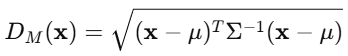


Ciri Mahalanobis distance:

1. Mengoreksi skala antar variabel

2. Memperhitungkan korelasi antar variabel

Berbeda dengan Euclidean distance yang mengasumsikan fitur saling independen dan sama skala

In [63]:
mean_vec = data_1.mean().values                        #mean
cov_matrix = data_1.cov()                              #covarian
inv_cov_matrix = np.linalg.inv(cov_matrix)             #invers covarian

# Mahalanobis Distance function
def mahalanobis_dist(x, mean, inv_cov):
    diff = x - mean
    return np.sqrt(np.dot(np.dot(diff.T, inv_cov), diff))

# Hitung Mahalanobis Distance untuk semua observasi

mahal_distances = np.array([mahalanobis_dist(x, mean_vec, inv_cov_matrix) for x in data_1.values])

print("ukuran = ", mahal_distances.shape)
mahal_distances

ukuran =  (400,)


array([1.39079408, 2.85397803, 1.4901324 , 1.83344553, 2.79748333,
       2.34395594, 1.91470232, 1.68243942, 1.73366153, 1.89862526,
       2.12064065, 2.30062739, 3.85453705, 1.930587  , 3.06952011,
       1.94319252, 1.85569544, 2.20982398, 1.17250667, 3.55125347,
       1.56312005, 1.76175263, 1.93813469, 1.97428719, 3.47528671,
       2.19731979, 2.49685907, 1.8274838 , 1.66077037, 0.67967641,
       2.0200906 , 2.78788145, 2.06658574, 1.94426118, 1.89120613,
       2.99429789, 2.62315392, 2.30083439, 2.31313948, 2.79013575,
       2.27873413, 3.28612431, 3.20691363, 1.58394226, 1.28643739,
       1.86299618, 0.70413304, 1.4786664 , 1.36198269, 2.18964392,
       1.6343969 , 1.80569013, 1.44192404, 1.59046617, 2.21411348,
       1.94563168, 1.69150392, 1.22471207, 2.70835174, 1.42503102,
       1.20433874, 0.92225414, 1.51858489, 1.95768651, 1.37435568,
       2.07421423, 2.88861278, 1.39508648, 1.8991967 , 2.75300624,
       1.63938717, 2.92241148, 2.27368013, 1.78717099, 2.30809

Semakin besar angka Mahalanobis Distance, artinya data semakin jauh dari pusat distribusi, mirip seperti "z-score" di data univariat.



### Step 2 : Deteksi Outlier dengan membandingkan angka di tabel Chi-Square



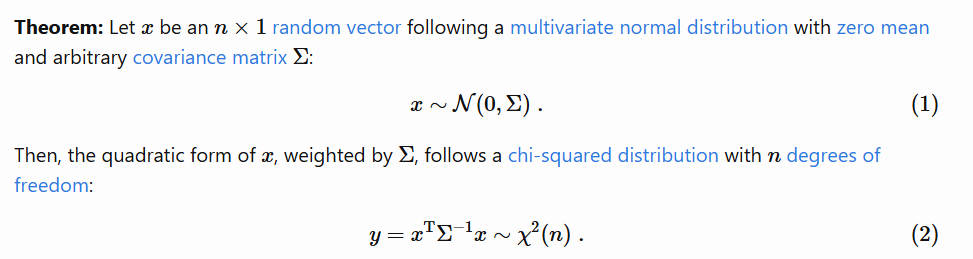

Jika di data univariat kita bisa deteksi outlier dengan membandingkan skor z-score dan nilai z-value di tabel distribusi normal, maka di multivariat kita bisa bandingkan kuadrat mahalanobis distance dengan nilai di tabel chi-square

In [64]:
# Threshold berdasarkan distribusi Chi-Square
p = data_1.shape[1]
threshold = chi2.ppf(0.95, df=p)

is_outlier = mahal_distances*mahal_distances > threshold

df_result = data_1.copy()
df_result['mahalanobis_dist'] = mahal_distances
df_result['outlier'] = is_outlier

df_result[df_result['outlier']==True]

,X1,X2,X3,X4,X5,mahalanobis_dist,outlier
12,-0.769142,-1.122545,1.738851,1.667224,3.753355,3.854537,True
19,-1.239258,-1.326472,-1.927673,0.721479,3.370832,3.551253,True
24,-3.019512,-1.531108,-0.052404,0.283751,0.855809,3.475287,True
82,-1.443855,1.992515,-0.606865,-2.152384,2.063908,3.638845,True
95,-0.075764,0.813205,3.926238,-1.075312,0.927132,4.046427,True
106,-0.900621,2.949094,-0.416194,0.532006,1.292336,3.347135,True
121,0.784604,2.985259,0.745005,-0.904068,0.010773,3.412050,True
133,0.591814,-0.918687,0.955301,0.574071,4.059337,3.501787,True
147,-0.828497,-0.564774,-2.991136,1.590582,1.394788,3.329794,True
151,1.661470,-1.879924,0.777407,-0.340908,5.457185,5.232232,True


### Step 3: Menghapus Outlier

In [65]:
# Menghapus outlier
data_1_no_outlier = df_result[df_result['outlier'] == False].drop(columns=['mahalanobis_dist', 'outlier'])
data_1_no_outlier

,X1,X2,X3,X4,X5
0,-0.675178,-0.721738,0.183835,0.185176,0.295972
1,-0.144519,0.176821,2.693034,0.425445,0.249296
2,-0.792420,-0.546680,0.349800,0.222290,0.148645
3,-0.307962,-0.271655,-1.004055,1.278866,1.959788
4,-1.893615,1.673452,-0.095464,-0.952316,0.693264
...,...,...,...,...,...
395,-1.449645,-0.848429,-1.880010,1.146441,0.228237
396,-0.921860,0.573128,0.712712,-0.973379,0.345186
397,-1.003957,-1.785866,-1.883150,1.007133,1.380745
398,0.207267,-0.359630,-0.372319,0.336145,0.658941


## 4. Uji Normalitas Multivariat Kembali Pada data_1 Tanpa Outlier

$H_0$ : Data berdistribusi normal multivariat

$H_1$ : Data tidak berdistribusi normal multivariat

### a. Uji Henze-Zirkler

In [66]:
#Uji Henze-Zirkler semua data
pg.multivariate_normality(data_1_no_outlier, alpha=0.05)

HZResults(hz=np.float64(1.427141241466199), pval=np.float64(2.416757667731309e-12), normal=False)

**KESIMPULAN:**

Jika seluruh variabel dalam data disertakan, diperoleh nilai pvalue $< 0.05,$ maka $H_0$ ditolak, sehingga data tidak berdistribusi normal.

In [67]:
#Uji Henze-Zirkler khusus data X1 - X4 aja
pg.multivariate_normality(data_1_no_outlier[['X1', 'X2', 'X3', 'X4']], alpha=0.05)

HZResults(hz=np.float64(0.8617568677124032), pval=np.float64(0.5733266780597251), normal=True)

**KESIMPULAN:**

Jika seluruh variabel dalam data disertakan tanpa variabel X5, diperoleh nilai pvalue $\geq 0.05,$ maka $H_0$ diterima, sehingga data berdistribusi normal multivariat.

### b. Uji Histogram & Mardia

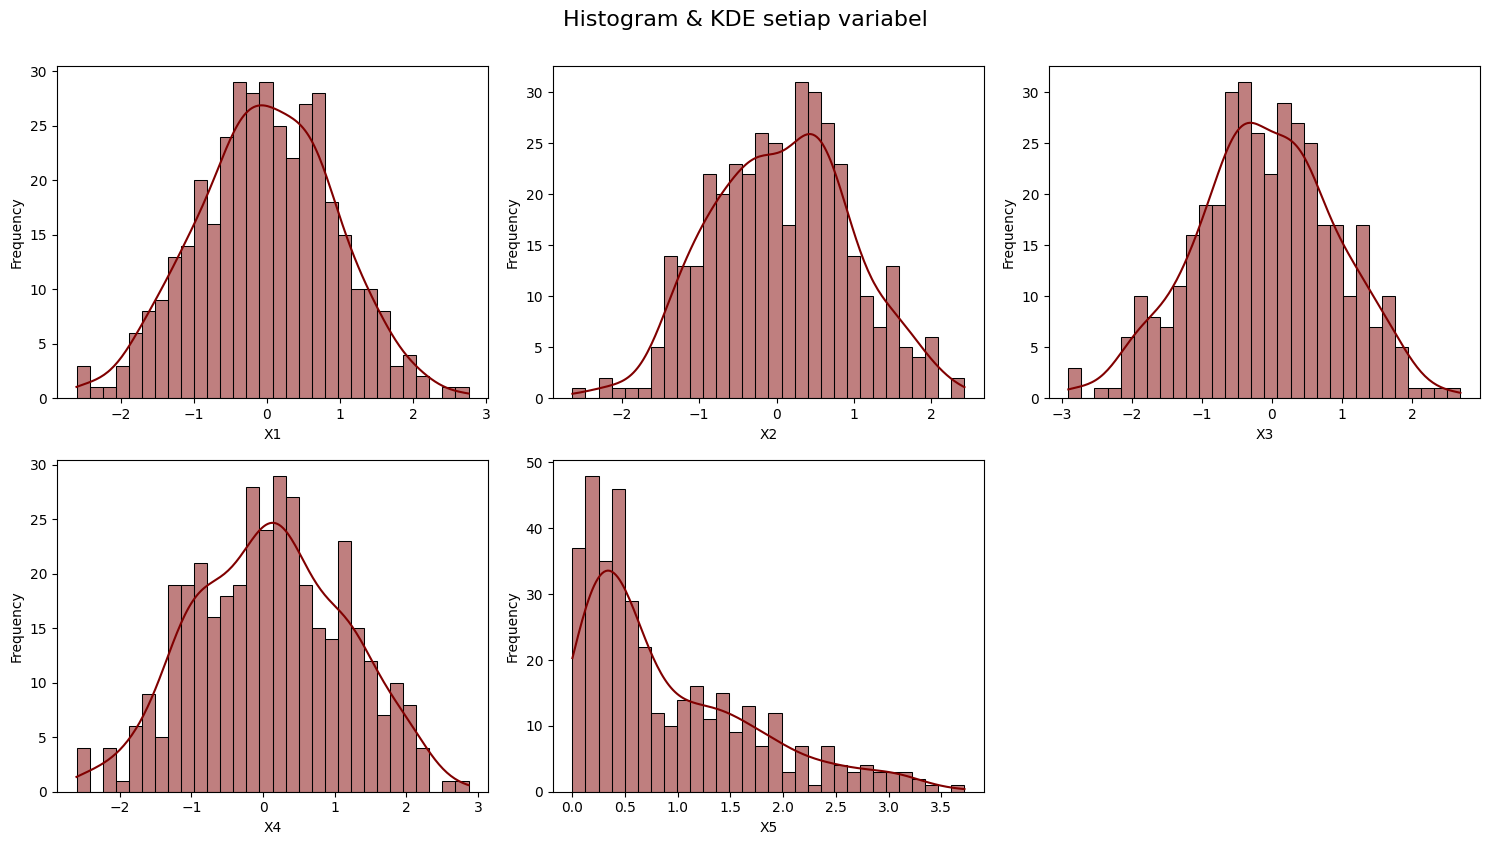

In [68]:
# Membuat Histogram 1 per 1
plt.figure(figsize=(15,8))
for i, col in enumerate(['X1', 'X2', 'X3', 'X4', 'X5']):
    plt.subplot(2, 3, i+1)
    sns.histplot(data_1_no_outlier[col], kde=True, bins=30, color='maroon')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Histogram & KDE setiap variabel', fontsize=16, y=1.05)
plt.show()


**KESIMPULAN:**

Data tidak berdistribusi normal multivariat karena ada data X5 tidak berdistribusi normal.

## 5. Total Unduplicated Reach and Frequency (TURF)

Total Unduplicated Reach and Frequency (TURF) adalah analisis menentukan kombinasi produk, fitur, atau treatment lainnya yang menjangkau reach terbanyak. Beberapa istilah :


*   Incremental reach : persentase tambahan frekuensi (frekuensi yang pilih item tersebut tapi tidak pilih item sebelumnya)
*   Total reach : persentase kumulatif



Contoh kasus :
Misalkan dari sejumlah survey, 400 respondent ini mengenali produk skincare perusahaan A dari 100 lokasi iklan berikut (yang terkode 1).


In [69]:
data = pd.read_excel("data/data_2.xlsx")
data.head()

,Id,Usia,Kendaraan,Lokasi 1,Lokasi 2,Lokasi 3,Lokasi 4,Lokasi 5,Lokasi 6,Lokasi 7,...,Lokasi 91,Lokasi 92,Lokasi 93,Lokasi 94,Lokasi 95,Lokasi 96,Lokasi 97,Lokasi 98,Lokasi 99,Lokasi 100
0,1,22,Motor,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,25,Mobil,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,3,18,KRL,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4,30,TJ,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
4,5,35,KRL,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Jika perusahaan A ingin mengeluarkan produk baru, berapa jumlah spanduk dan lokasi optimal agar dapat menjangkau target jumlah customer yang diinginkan? Bagaimana pula jika target mereka adalah pengendara motor?


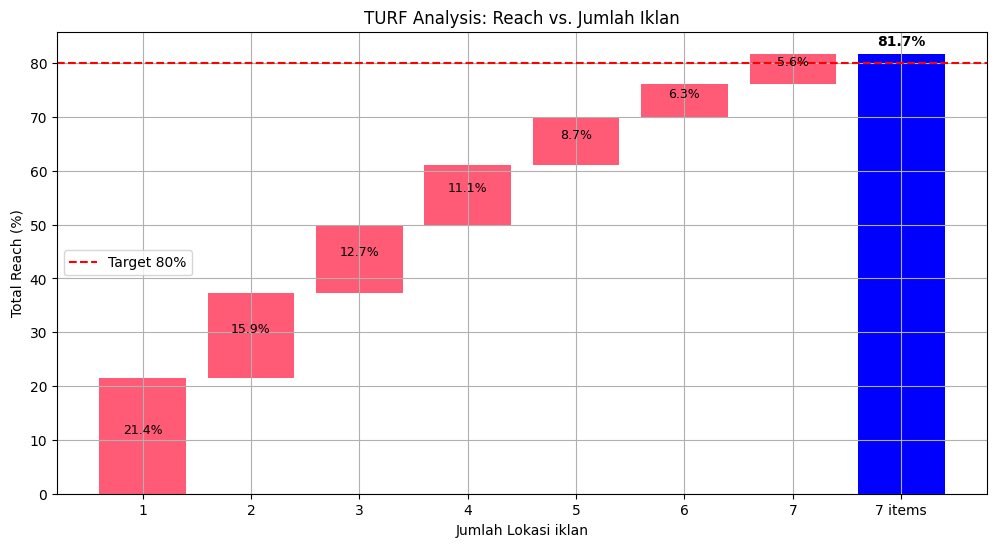

Untuk mencapai minimal 80%, perlu 7 OOH.

 Lokasi iklan agar mencapai target : ['Lokasi 86', 'Lokasi 46', 'Lokasi 48', 'Lokasi 66', 'Lokasi 74', 'Lokasi 22', 'Lokasi 85']


In [70]:
# @title Reach vs. Jumlah Iklan Berdasarkan Usia
data = "data/data_2.xlsx"  #@param {type:"string"}
Kategori_Usia = '31-35'  # @param ["All", "16-20", "21-25", "26-30", "31-35"]
Target_dalam_persen = 80  # @param

data_used = pd.read_excel(data)

# Kategorikan usia
bins = [15, 20, 25, 30, 35]
labels = ['16-20', '21-25', '26-30', '31-35']
data_used['Kategori Usia'] = pd.cut(data_used['Usia'], bins=bins, labels=labels, right=True)

# Filter berdasarkan kategori usia
if Kategori_Usia != 'All':
    data_used = data_used[data_used['Kategori Usia'] == Kategori_Usia]

if len(data_used) == 0:
    raise SystemExit("Data kosong! Program dihentikan.")

target_reach_pct = Target_dalam_persen/100
target_reach = int(target_reach_pct * len(data_used))


index_ = data_used.columns.get_loc("Lokasi 1")   #nomor kolom data
reach_columns = data_used.columns[index_:]
reach_columns = [col for col in reach_columns if data_used[col].dropna().isin([0, 1]).all()]
reach_per_item = data_used[reach_columns].sum(axis=0).sort_values(ascending=False)

#Algoritma Greedy untuk menemukan kombinasi optimal
selected_items = []
current_reach = set()
reach_progress = []

for item in reach_per_item.index:    #hitung reach
    new_reach = current_reach | set(data_used.index[data_used[item] == 1])  # Tambah reach baru
    selected_items.append(item)
    reach_progress.append(len(new_reach) / len(data_used))  # Simpan progres reach

    if len(new_reach) >= target_reach:
        break  # Selesai jika sudah mencapai target

    current_reach = new_reach  # Perbarui reach

# Hitung incremental reach
incrementals = [reach_progress[0]] + [reach_progress[i] - reach_progress[i-1] for i in range(1, len(reach_progress))]


# Bar chart bertingkat
plt.figure(figsize=(12, 6))
bottoms = 0
for i, inc in enumerate(incrementals):
    plt.bar("{}".format(i+1), inc * 100, bottom=bottoms, color="#ff5b77")
    plt.text(i, bottoms + inc*50, f"{inc*100:.1f}%", ha='center', va='bottom', fontsize=9)
    bottoms += inc * 100
plt.axhline(y=target_reach_pct * 100, color='r', linestyle='--', label=f'Target {target_reach_pct*100:.0f}%')


# Bar terakhir (semua item, misal 50)
total_reach = len(set(data_used.index[data_used[selected_items[-1]] == 1])) / len(data_used)
plt.bar(f"{len(selected_items)} items", reach_progress[-1] * 100, color="blue")
plt.text(len(selected_items), reach_progress[-1] * 100 + 1, f"{reach_progress[-1]*100:.1f}%",
         ha='center', va='bottom', fontsize=10, fontweight='bold')

#Label
plt.xlabel("Jumlah Lokasi iklan")
plt.ylabel("Total Reach (%)")
plt.title("TURF Analysis: Reach vs. Jumlah Iklan")
plt.legend()
plt.grid(True)
plt.savefig('reach_vs_ads.png')
plt.show()


#Output hasil
max_reach = max(reach_progress)  # Ubah ke persen

if max_reach>=target_reach_pct:
  print(f"Untuk mencapai minimal {target_reach_pct*100:.0f}%, perlu {len(selected_items)} OOH.")
else:
  print(f"Tidak dapat mencapai {target_reach_pct*100:.0f}%.")
  print(f"maksimal hanya {max_reach*100:.0f}%, dengan {len(selected_items)} OOH")

print("\n Lokasi iklan agar mencapai target :", selected_items[:len(selected_items)])  # Menampilkan lokasi iklan agar optimal


**KESIMPULAN:**

1. Pada semua kategori usia untuk mencapai minimal 80%, perlu 10 OOH. Berikut ini lokasi iklan agar mencapai target : Lokasi 32, Lokasi 66, Lokasi 7, Lokasi 73, Lokasi 95, Lokasi 85, Lokasi 46, Lokasi 78, Lokasi 28, Lokasi 12.
2. Pada kategori usia 16 - 20 tahun Tidak dapat mencapai 80%. Maksimal hanya 79.7%, dengan 7 OOH. Berikut ini lokasi iklan agar mencapai target : Lokasi 7, Lokasi 98, Lokasi 54, Lokasi 79, Lokasi 85, Lokasi 63, Lokasi 52.
3. Pada kategori usia 21 - 25 tahun untuk mencapai minimal 80%, perlu 9 OOH. Berikut ini lokasi iklan agar mencapai target : Lokasi 4, Lokasi 32, Lokasi 46, Lokasi 78, Lokasi 24, Lokasi 68, Lokasi 3, Lokasi 73, Lokasi 51.
4. Pada kategori usia 26 - 30 tahun untuk mencapai minimal 80%, perlu 7 OOH. Berikut ini lokasi iklan agar mencapai target : Lokasi 32, Lokasi 13, Lokasi 73, Lokasi 66, Lokasi 95, Lokasi 54, Lokasi 96.
5. Pada kategori usia 31 - 35 tahun untuk mencapai minimal 80%, perlu 7 OOH. Berikut ini lokasi iklan agar mencapai target : Lokasi 86, Lokasi 46, Lokasi 48, Lokasi 66, Lokasi 74, Lokasi 22, Lokasi 85.